<a href="https://colab.research.google.com/github/JiHoonYoon00/mulcamp34/blob/main/plotly2_240109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파일 목록 확인

In [3]:
import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("./kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
df.head(2)

FileNotFoundError: [Errno 2] No such file or directory: './kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv'

In [6]:
questions = df.iloc[0,:].T
questions

NameError: name 'df' is not defined

In [ ]:
df = df.iloc[1:, :].reset_index(drop = True)
df.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Q25'].value_counts()  #그룹화 해야함

Q25
$0-999              3369
1,000-1,999          969
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          699
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        550
25,000-29,999        469
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: count, dtype: int64

In [2]:
temp = pd.DataFrame({
  "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "Contestant": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "Number Eaten": [2, 1, 3, 1, 3, 2],
})

temp

NameError: name 'pd' is not defined

## express 방식
-막대그래프

In [1]:
import plotly.express as px

fig = px.bar(temp, x = 'Fruit', y ="Number Eaten",color = "Contestant",barmode = 'group')
fig.show()

NameError: name 'temp' is not defined

In [ ]:
long_df = px.data.medals_long()
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


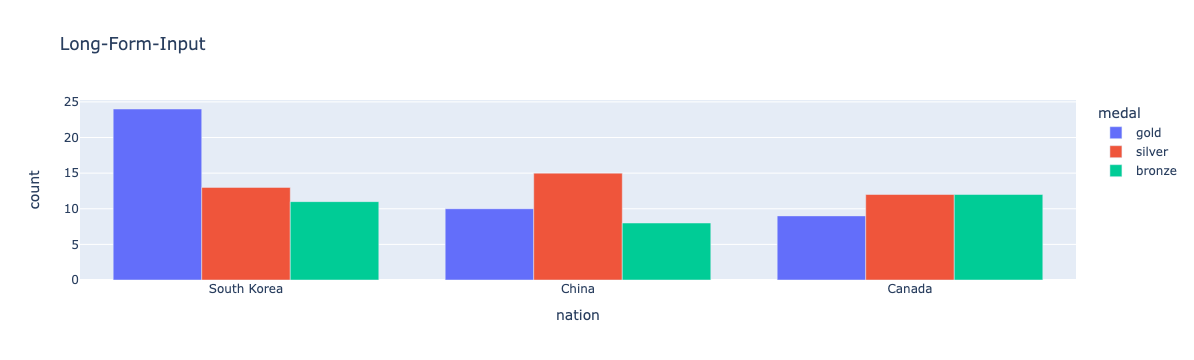

In [ ]:
fig = px.bar(long_df, x = 'nation', y ="count",
             color = "medal",
             barmode = 'group',
            title = 'Long-Form-Input'
            )
fig.show()

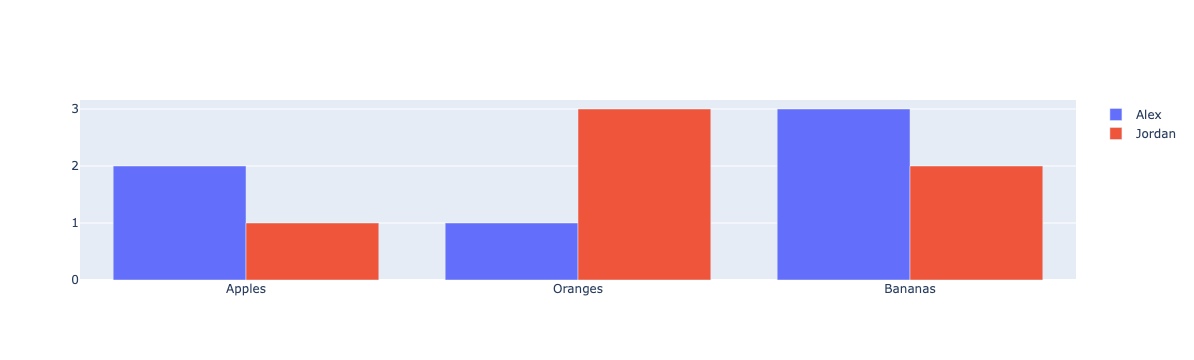

In [ ]:
#graph objects방식

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(name = "Alex", x = temp['Fruit'], y = temp[temp['Contestant'] == "Alex"]['Number Eaten'].values))
fig.add_trace(go.Bar(name = "Jordan", x = temp['Fruit'], y = temp[temp['Contestant'] == "Jordan"]['Number Eaten'].values))
fig.update_layout(barmode='group')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(name = "Alex", x = temp['Fruit'], y = temp[temp['Contestant'] == "Alex"]['Number Eaten'].values))
fig.add_trace(go.Bar(name = "Jordan", x = temp['Fruit'], y = temp[temp['Contestant'] == "Jordan"]['Number Eaten'].values))
fig.update_layout(barmode='group')
fig.show('json')

## 응답자 연령대 시각화

In [ ]:
df['Q1'].value_counts()

Q1
25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     962
55-59     592
60-69     553
70+       128
Name: count, dtype: int64

## 막대그래프 Q1
- 위결과 q1에 저장
  

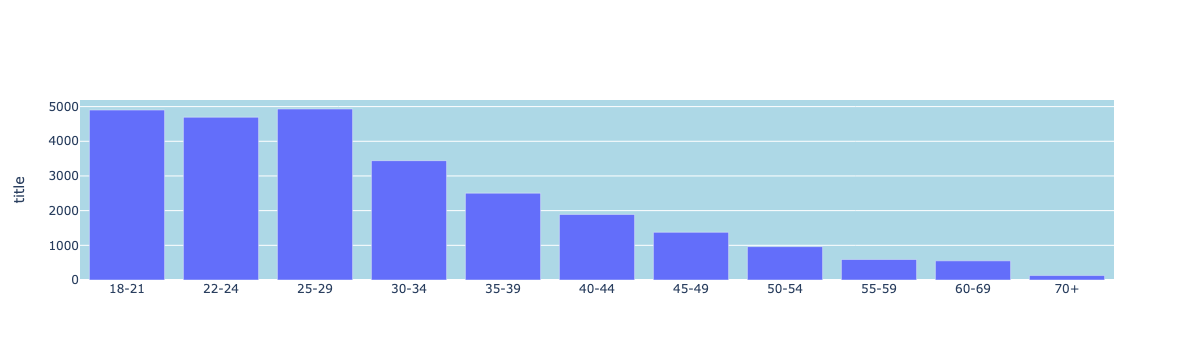

In [ ]:
q1_df = df['Q1'].value_counts()

CATEGORY_ORDER = ["18-21", "22-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-69", "70+"]

fig = go.Figure()
fig.add_trace(
    #시각화의 종류
    go.Bar(x = q1_df.index, y = q1_df.values)
) #시각화 차트 생성
#시각화 스타일
fig.update_layout(
    xaxis = dict(categoryorder = 'array', categoryarray = (CATEGORY_ORDER)),
    plot_bgcolor='lightblue',
    yaxis = dict(title = 'title')

)


fig.show()

In [ ]:
df['Q2'].value_counts()

Q2
Man                        20596
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: count, dtype: int64

In [ ]:
q1_q2_df = df.loc[:, ["Q1", "Q2"]].replace({'Prefer not to say':'etc', 'Nonbinary':"etc", "Prefer to self-describe": "etc"})
q1_q2_df['Q2'].value_counts()  #그룹화

Q2
Man      20596
Woman     4890
etc        485
Name: count, dtype: int64

In [ ]:
q1_q2_df = q1_q2_df.groupby(['Q2','Q1']).size().reset_index().rename(columns = {0:"Count"})
q1_q2_df.head()

,Q2,Q1,Count
0,Man,18-21,3696
1,Man,22-24,3643
2,Man,25-29,3859
3,Man,30-34,2765
4,Man,35-39,1993


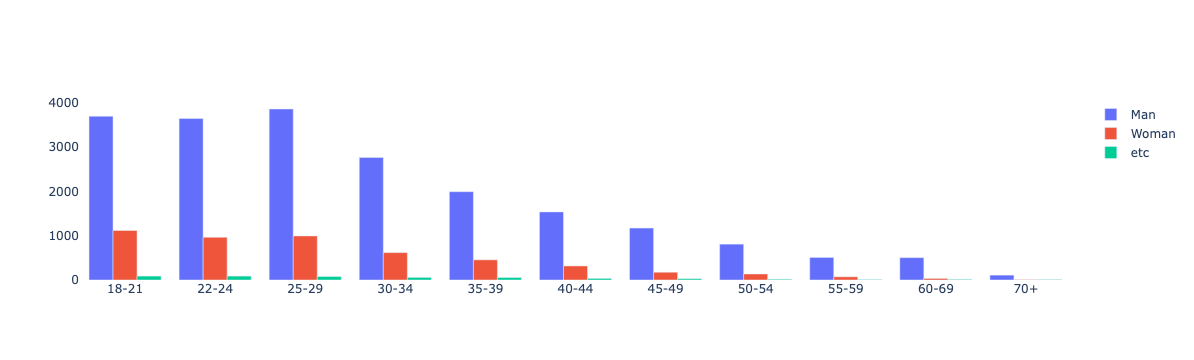

In [ ]:
fig = go.Figure()
for gender, group in q1_q2_df.groupby("Q2"):

    fig.add_trace(go.Bar(x = group['Q1'], y = group['Count'], name = gender))

fig.update_layout(plot_bgcolor = 'white')

fig.show()

In [ ]:
q3_df = df['Q3'].value_counts()
q3_df

Q3
India                       7433
United States of America    2650
Other                       1270
Japan                        921
China                        814
                            ... 
Kazakhstan                    45
Norway                        45
Algeria                       44
Ethiopia                      43
Iraq                          43
Name: count, Length: 66, dtype: int64

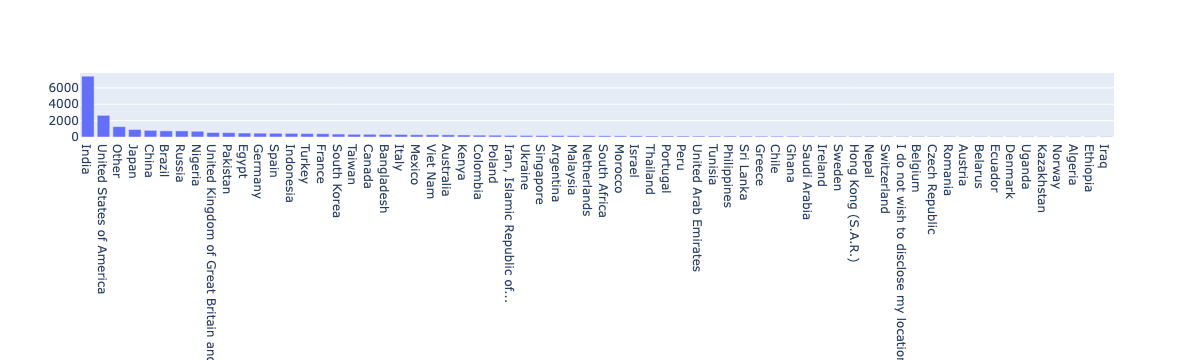

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = q3_df.index, y = q3_df.values))
fig.show()

#어떻게 그룹화를 진행할 것인가..?

In [ ]:
q3_q25 = df.loc[:,['Q3', 'Q25']]
q3_q25

,Q3,Q25
0,Pakistan,$0-999
1,Mexico,"30,000-39,999"
2,India,"30,000-39,999"
3,India,NaN
4,India,NaN
...,...,...
25966,Egypt,"15,000-19,999"
25967,China,NaN
25968,Sweden,$0-999
25969,United States of America,NaN


In [ ]:
q3_q25['Q25'].value_counts()
q3_q25['Q25'] = q3_q25['Q25'].replace(['$0-999', '1,000-1,999'], '$0-1,999')
q3_q25['Q25'].value_counts()

Q25
$0-1,999            4338
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          699
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        550
25,000-29,999        469
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: count, dtype: int64

In [ ]:
q3_q25['Q25'] = q3_q25['Q25'].replace(['$0-999', '1,000-1,999'], '$0-1,999')
q3_q25['Q25'] = q3_q25['Q25'].replace(['2,000-2,999', '3,000-3,999'], '$2,000-3,999')
q3_q25['Q25'] = q3_q25['Q25'].replace(['4,000-4,999', '5,000-7,499'], '$4,000-7,499')
q3_q25['Q25'] = q3_q25['Q25'].replace(['25,000-29,999', '60,000-69,999',
                       '30,000-39,999','15,000-19,999', '70,000-79,999',
                       '10,000-14,999', '20,000-24,999', '7,500-9,999',
                       '100,000-124,999', '40,000-49,999', '50,000-59,999',
                       '300,000-499,999', '200,000-249,999', '125,000-149,999',
                       '250,000-299,999', '80,000-89,999', '90,000-99,999',
                       '150,000-199,999', '>$1,000,000', '$500,000-999,999'], '$7,500+')

q3_q25['Q25'].value_counts()

Q25
$7,500+         8941
$0-1,999        4338
$4,000-7,499    1155
$2,000-3,999     955
Name: count, dtype: int64

In [ ]:
q3_q25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25971 entries, 0 to 25970
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q3      25971 non-null  object
 1   Q25     15389 non-null  object
dtypes: object(2)
memory usage: 405.9+ KB


In [ ]:
q3_q25 = q3_q25.dropna(subset =['Q25'])
q3_q25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15389 entries, 0 to 25970
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q3      15389 non-null  object
 1   Q25     15389 non-null  object
dtypes: object(2)
memory usage: 360.7+ KB


In [ ]:
q3_q25= q3_q25.groupby(['Q3','Q25']).size().reset_index().rename(columns = {0:"Count"})
q3_q25.head()

,Q3,Q25,Count
0,Algeria,"$0-1,999",14
1,Algeria,"$2,000-3,999",1
2,Algeria,"$4,000-7,499",3
3,Algeria,"$7,500+",5
4,Argentina,"$0-1,999",34


In [ ]:
india_df = q3_q25.loc[q3_q25['Q3'] =='India',:].reset_index(drop = True)
india_df['Percentage'] = np.round(india_df['Count']/india_df['Count'].sum()*100)# np.round 반올림
india_df

,Q3,Q25,Count,Percentage
0,India,"$0-1,999",1214,36.0
1,India,"$2,000-3,999",239,7.0
2,India,"$4,000-7,499",451,13.0
3,India,"$7,500+",1471,44.0


In [ ]:
usa_df = q3_q25.loc[q3_q25['Q3'] =='United States of America',:].reset_index(drop = True)
usa_df['Percentage'] = usa_df['Count']/usa_df['Count'].sum()*100
usa_df

,Q3,Q25,Count,Percentage
0,United States of America,"$0-1,999",140,7.588076
1,United States of America,"$2,000-3,999",19,1.029810
2,United States of America,"$4,000-7,499",17,0.921409
3,United States of America,"$7,500+",1669,90.460705


In [ ]:
indi_usa = pd.concat([india_df,usa_df],ignore_index = True)
indi_usa

,Q3,Q25,Count,Percentage
0,India,"$0-1,999",1214,36.000000
1,India,"$2,000-3,999",239,7.000000
2,India,"$4,000-7,499",451,13.000000
3,India,"$7,500+",1471,44.000000
4,United States of America,"$0-1,999",140,7.588076
5,United States of America,"$2,000-3,999",19,1.029810
6,United States of America,"$4,000-7,499",17,0.921409
7,United States of America,"$7,500+",1669,90.460705


In [ ]:
india_df['%'] = np.round(india_df['Percentage'] * 100, 1)
usa_df['%'] = np.round(usa_df['Percentage'] * 100, 1)

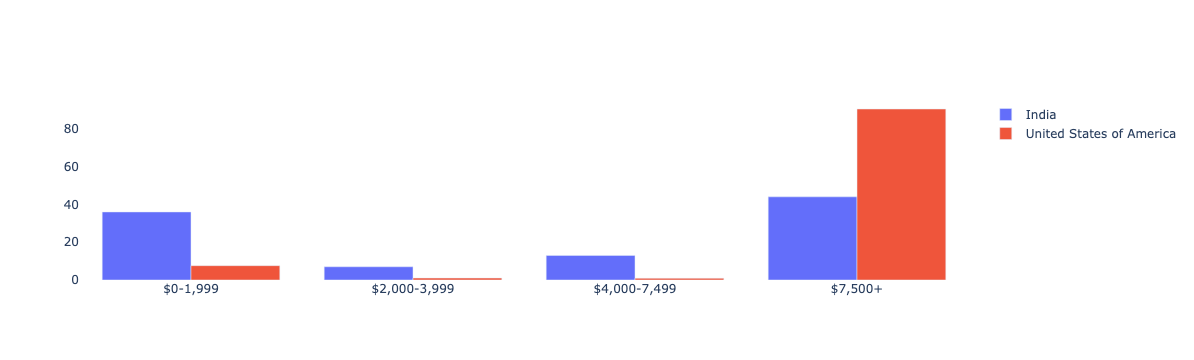

In [ ]:
fig = go.Figure()
for country, group in indi_usa.groupby("Q3"):

    fig.add_trace(go.Bar(x = group['Q25'], y = group['Percentage'], name = country))

fig.update_layout(plot_bgcolor = 'white')


fig.show()

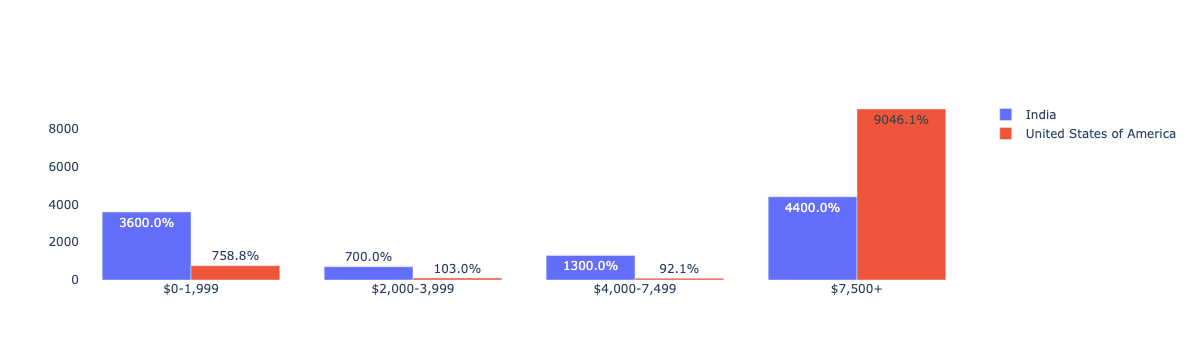

In [ ]:
india_usa_df = pd.concat([india_df, usa_df]).reset_index()
fig = go.Figure()
for country, group in india_usa_df.groupby("Q3"):
   fig.add_trace(go.Bar(x = group['Q25'],
                        y = group['%'],
                        name = country,
                        text = group['%'].astype(str) + "%",
                        textposition='auto'))
fig.update_layout(barmode="group",
                  plot_bgcolor = "white")
fig.show()